In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
from io import BytesIO
from ipywidgets import widgets

In [ ]:
!unzip -q '/content/drive/MyDrive/Tensorflow Course 2/Datasets/rps.zip'

In [ ]:
BASE_DIR = '/content/rps'



rock_dir = os.path.join(BASE_DIR, 'rock')
paper_dir = os.path.join(BASE_DIR, 'paper')
scissor_dir = os.path.join(BASE_DIR, 'scissors')

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissor_files = os.listdir(scissor_dir)


print(f'5 files in the rock sub directory are: {rock_files[:5]}')
print(f'5 files in the paper sub directory are: {paper_files[:5]}')
print(f'5 files in the scissor sub directory are: {scissor_files[:5]}')

5 files in the rock sub directory are: ['rock05ck01-043.png', 'rock03-080.png', 'rock02-009.png', 'rock02-006.png', 'rock06ck02-012.png']
5 files in the paper sub directory are: ['paper02-001.png', 'paper05-110.png', 'paper01-001.png', 'paper02-096.png', 'paper03-012.png']
5 files in the scissor sub directory are: ['scissors04-041.png', 'scissors03-063.png', 'scissors04-004.png', 'scissors02-000.png', 'testscissors03-110.png']


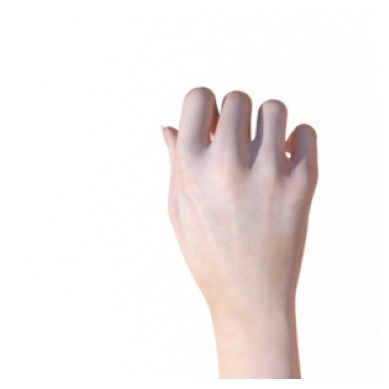

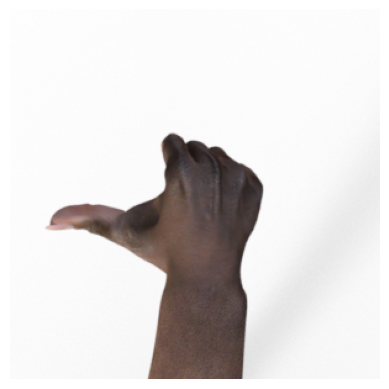

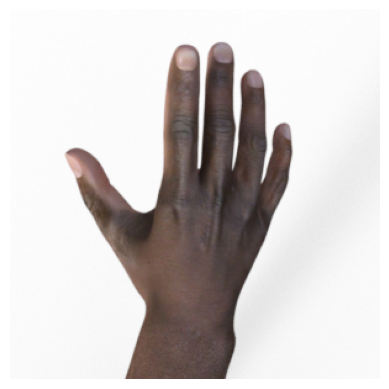

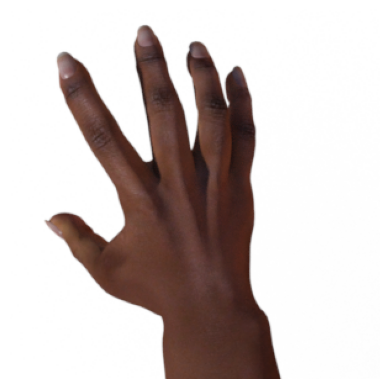

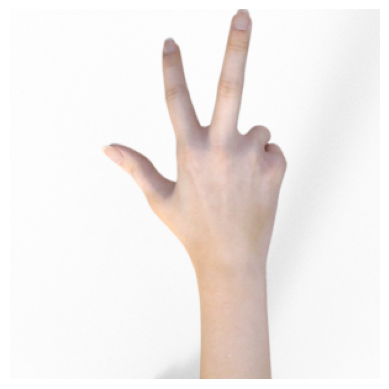

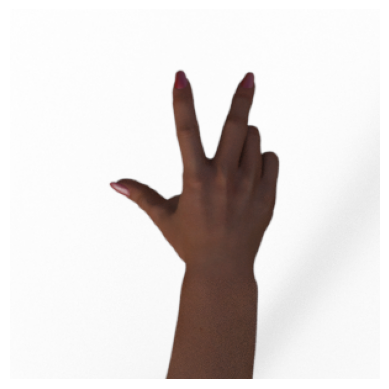

In [ ]:
next_rock = [os.path.join(rock_dir, fname)
            for fname in random.sample(rock_files, k=2)]

next_paper = [os.path.join(paper_dir, fname)
              for fname in random.sample(paper_files, k=2)]

next_scissor = [os.path.join(scissor_dir, fname)
                for fname in random.sample(scissor_files, k=2)]


for i, img_path in enumerate(next_rock+next_paper+next_scissor):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.Input(shape=(150, 150, 3)),
tf.keras.layers.Rescaling(1./255),

tf.keras.layers.Conv2D(64, (3,3),  activation='relu'),
tf.keras.layers.MaxPool2D(2,2),

tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
!unzip -q '/content/drive/MyDrive/Tensorflow Course 2/Datasets/rps-test-set.zip'

In [ ]:
TRAINING_DIR = '/content/rps'
VALIDATION_DIR = '/content/rps-test-set'


training_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAINING_DIR,
    label_mode='categorical',
    batch_size=32,
    image_size=(150, 150)
)
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    VALIDATION_DIR,
    label_mode='categorical',
    batch_size=32,
    image_size=(150, 150)
)


SHUFFLE_BUFFER_SIZE = 1000
PRE_FETCH_BUFFER_SIZE = tf.data.AUTOTUNE

training_dataset_final = (training_dataset.cache()
.shuffle(SHUFFLE_BUFFER_SIZE)
.prefetch(PRE_FETCH_BUFFER_SIZE)
)

validation_dataset_final = (validation_dataset.cache()
.shuffle(SHUFFLE_BUFFER_SIZE)
.prefetch(PRE_FETCH_BUFFER_SIZE)
)


Found 2520 files belonging to 3 classes.
Found 372 files belonging to 3 classes.


In [ ]:
data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(150, 150, 3)),
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomTranslation(0.2, 0.2),
    tf.keras.layers.RandomContrast(0.2)
])


model_with_augmentation = tf.keras.models.Sequential([
    data_augmentation,
    model
])

In [ ]:
model_with_augmentation.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model_with_augmentation.fit(
    training_dataset_final,
    epochs=25,
    validation_data=validation_dataset_final,
    verbose = 1
)

Epoch 1/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 210s 3s/step - accuracy: 0.3202 - loss: 1.1824 - val_accuracy: 0.3333 - val_loss: 1.0917
Epoch 2/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.3903 - loss: 1.1016 - val_accuracy: 0.7984 - val_loss: 0.8394
Epoch 3/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.5376 - loss: 0.9444 - val_accuracy: 0.8118 - val_loss: 0.4681
Epoch 4/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.6765 - loss: 0.7041 - val_accuracy: 0.9382 - val_loss: 0.1863
Epoch 5/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.8085 - loss: 0.4790 - val_accuracy: 0.9516 - val_loss: 0.1297
Epoch 6/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.8330 - loss: 0.4187 - val_accuracy: 0.9731 - val_loss: 0.1124
Epoch 7/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.8865 - loss: 0.2963 - val_accuracy: 0.9839 - val_loss: 0.0681
Epoch 8/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.9093 - loss: 0.2569 - val_accuracy: 0.9758 - v

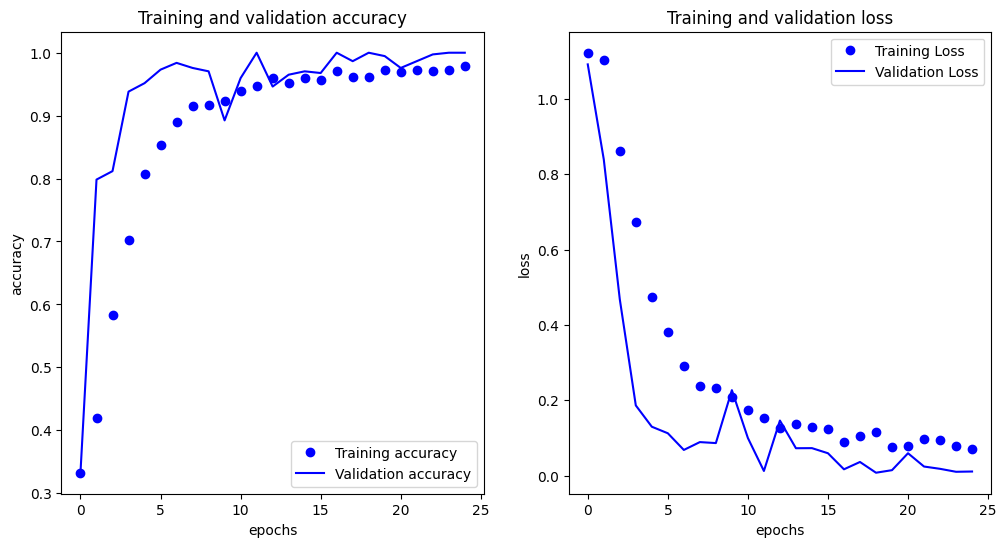

In [ ]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  fig, ax = plt.subplots(1,2, figsize=(12, 6))
  ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
  ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
  ax[0].set_title('Training and validation accuracy')
  ax[0].set_xlabel('epochs')
  ax[0].set_ylabel('accuracy')
  ax[0].legend()

  ax[1].plot(epochs, loss, 'bo', label='Training Loss')
  ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
  ax[1].set_title('Training and validation loss')
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('loss')
  ax[1].legend()

  plt.show()

plot_loss_acc(history)

In [ ]:
!unzip -q '/content/drive/MyDrive/Tensorflow Course 2/Datasets/rps-validation (1).zip'

In [ ]:
# Create the widget and take care of the display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(150, 150))
    image = tf.keras.utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image, verbose=0)[0]

    with out:

        print(f'\nmodel output: {prediction}')

        prediction_index = np.argmax(prediction)

        classes = ["paper", "rock", "scissors"]

        predicted_class = classes[prediction_index]

        print(f'{filename} is {predicted_class}')


def on_upload_change(change):
    """ A function for geting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)

    items = change.new
    for filename, item in items.items(): # Loop if there is more than one file uploaded
        file_jpgdata = BytesIO(item['content'])
        file_predict(filename, file_jpgdata, out)


uploader.observe(on_upload_change, names='value')

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()